In [105]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

%config InlineBackend.figure_formats = ['svg']
sns.set(rc={"figure.figsize":(10,7)})

In [106]:
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x+i*.5)*(7-i)*flip)

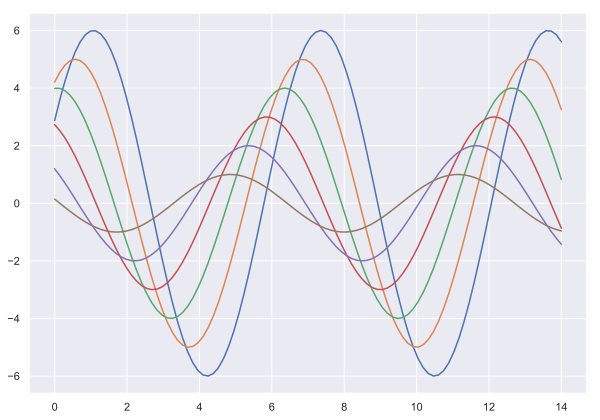

In [107]:
sns.set()
sinplot()

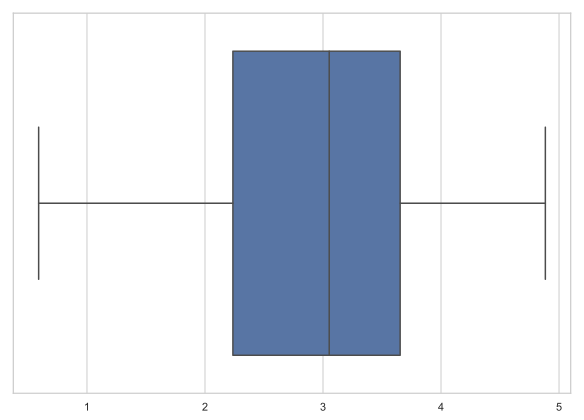

In [108]:
sns.set_style("whitegrid")
data = np.random.normal(size=(20,6))+np.array(6)/2
sns.boxplot(data)

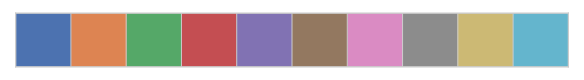

In [109]:
cp = sns.color_palette()
sns.palplot(cp)

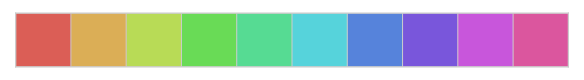

In [110]:
sns.palplot(sns.color_palette('hls', 10))

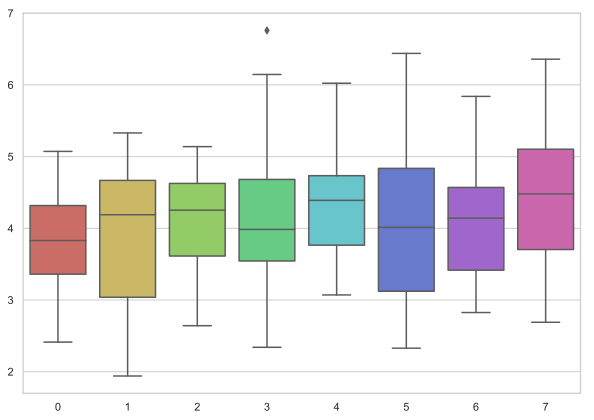

In [111]:
data = np.random.normal(size=(20,8))+np.array(8)/2
sns.boxplot(data=data, palette=sns.color_palette('hls', 8))

In [112]:
sns.set(color_codes=True)
np.random.seed(sum(map(ord, "distributions")))

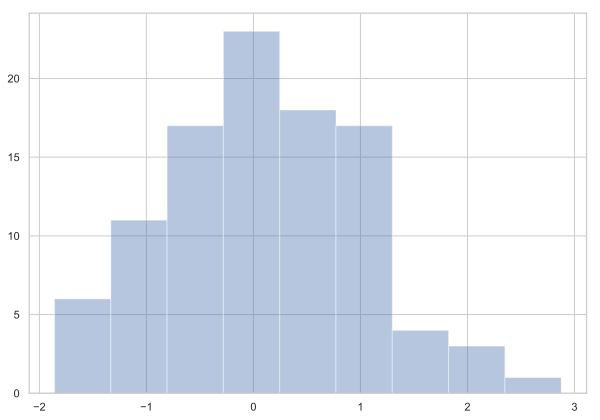

In [113]:
sns.set_style("whitegrid")
x = np.random.normal(size=100)
sns.distplot(x, kde=False)

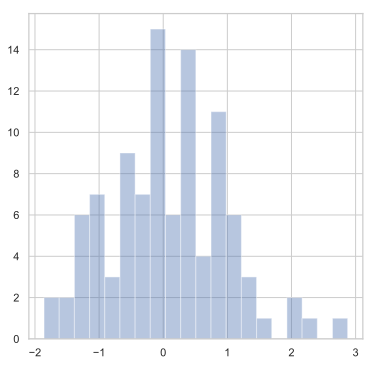

In [82]:
sns.distplot(x, bins=20, kde=False)

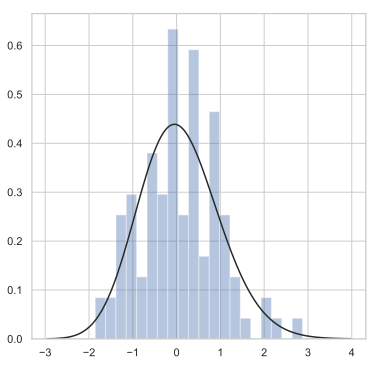

In [83]:
from scipy import stats, integrate
sns.distplot(x, bins=20, kde=False, fit=stats.gamma)

In [84]:
mean, cov = [0,1], [(1,.5),(.5,1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=["x", "y"])

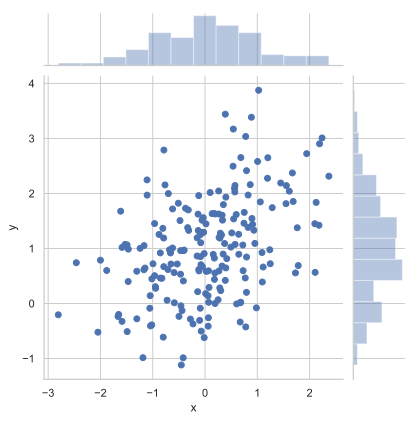

In [85]:
sns.jointplot(x='x', y='y', data=df)

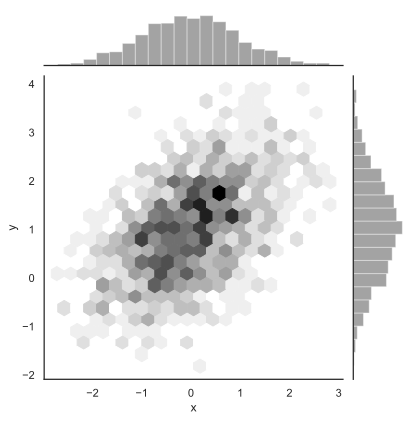

In [86]:
data = np.random.multivariate_normal(mean, cov, 1000)
df = pd.DataFrame(data,columns=["x", "y"])
with sns.axes_style("white"):
    sns.jointplot(x='x',y='y',data=df, kind='hex', color='k')

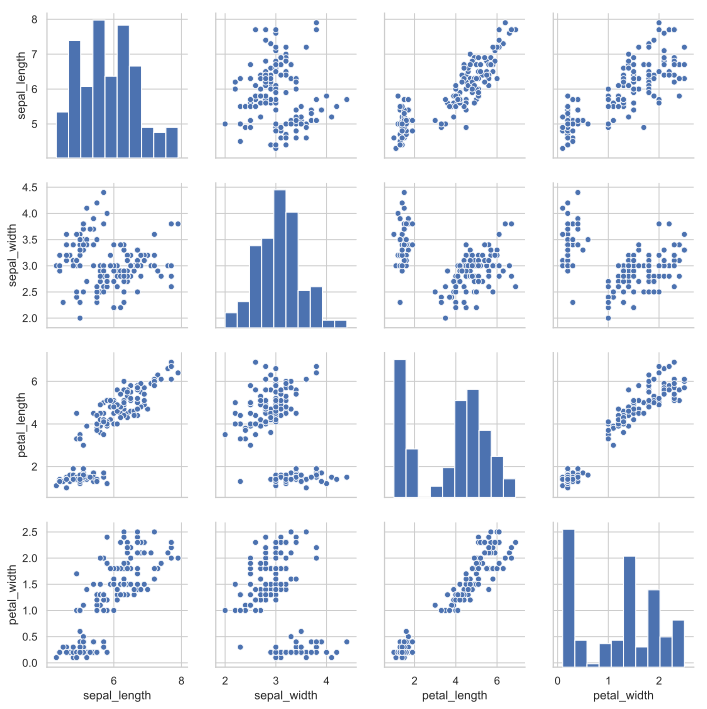

In [87]:
iris = sns.load_dataset("iris")
sns.pairplot(iris)
# 特征之间的关系

In [88]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


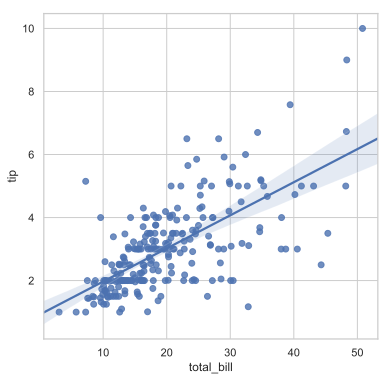

In [89]:
# 回归图
sns.regplot(x="total_bill", y='tip', data=tips)

In [90]:
titanic = sns.load_dataset('titanic')

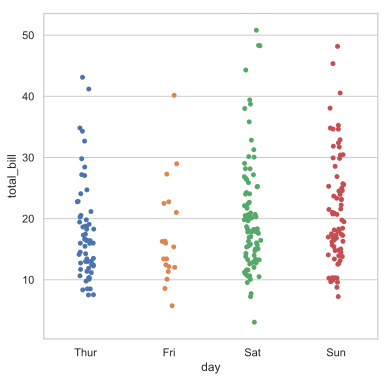

In [91]:
sns.stripplot(x='day', y='total_bill', data=tips, jitter=True)

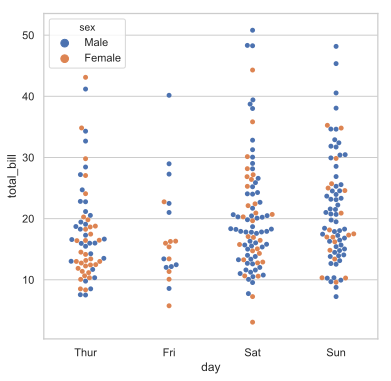

In [92]:
sns.swarmplot(x='day', y='total_bill', data=tips, hue="sex")

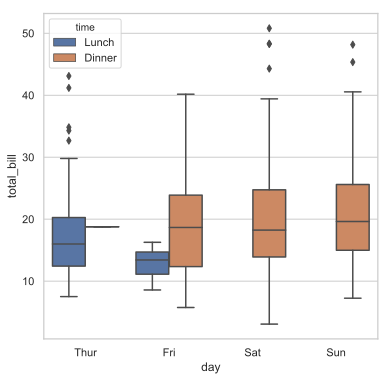

In [93]:
sns.boxplot(x='day',y='total_bill', hue='time', data=tips)

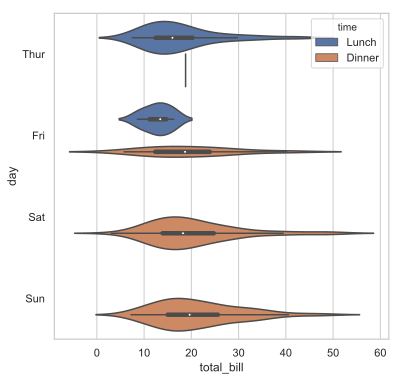

In [94]:
sns.violinplot(x="total_bill",  y='day', hue='time', data=tips)

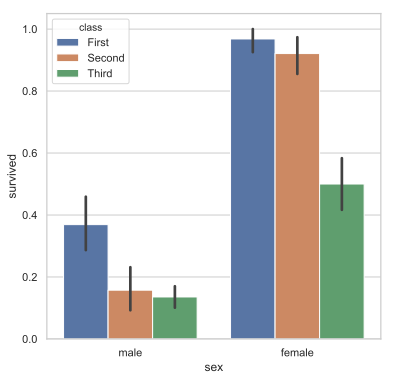

In [95]:
sns.barplot(x='sex', y='survived', hue='class', data=titanic)

数据差异度

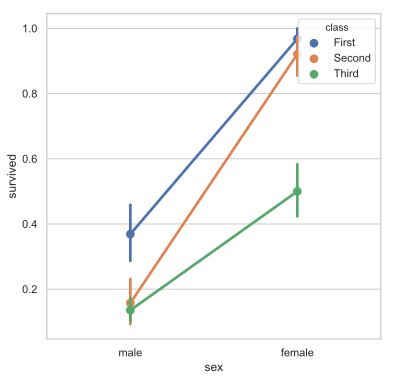

In [96]:
sns.pointplot(x='sex', y='survived', hue='class', data=titanic)

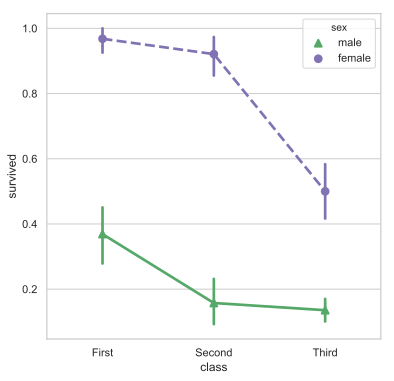

In [97]:
sns.pointplot(x='class', y='survived', hue='sex',data=titanic, 
              palette={'male':'g', 'female': 'm'},
              markers=['^', 'o'], linestyles=['-','--'])

## 子图展示

In [98]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


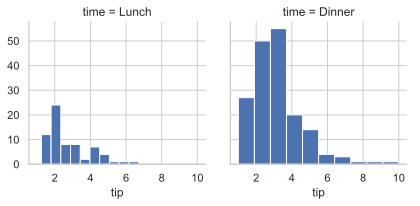

In [99]:
g = sns.FacetGrid(tips, col='time')
g.map(plt.hist, 'tip')

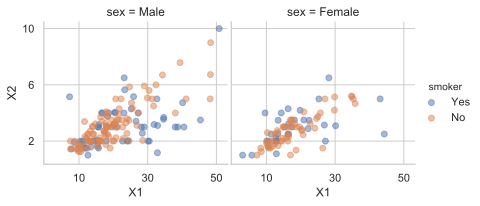

In [100]:
g = sns.FacetGrid(tips, col='sex', hue='smoker')
g.map(plt.scatter, 'total_bill', 'tip', alpha=.5)
g.set_axis_labels("X1", "X2")
g.set(xticks=[10,30,50], yticks=[2,6,10])
g.fig.subplots_adjust(wspace=.02,hspace=.02)
g.add_legend()

/usr/local/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


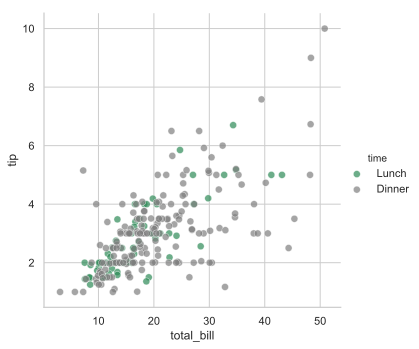

In [101]:
pal = dict(Lunch="seagreen",Dinner='gray')
g = sns.FacetGrid(tips, hue='time', palette=pal, size=5)
g.map(plt.scatter,'total_bill', 'tip', s=50, alpha=.7, linewidth=.5, edgecolor='white')
g.add_legend()

## 热力图